<div dir="rtl">
    <div style="text-align: center;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">بسمه تعالی</h1>
</div>

<h1 align="left">🌟 Project Title:</h1>
<h3 align="center">🚀 <b>Intelligent Oil Price Prediction Using Advanced Machine Learning Models and Neural Networks</b></h3>

<div style="text-align: center;">
    <a href="https://github.com/M-RezaeiGH">
        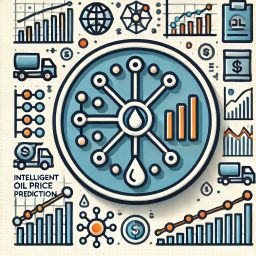
    </a>
</div>

<br><hr><br>

<h1 align="left">👨‍💻 Developer:</h1>
<h3 align="left">*** Mohammad Reza Rezaei ***</h3>

<div align="left">
  🔗 <a href="https://www.linkedin.com/in/m-rezaei/">LinkedIn</a> | 
  📂 <a href="https://github.com/M-RezaeiGH">GitHub</a>
</div>


##

## 📊 Dataset Introduction:
The dataset contains **1,262,329 rows** of real crude oil price data, which includes the following columns:

1. 📅 **DATE**: The date corresponding to the oil price.
2. ⏰ **TIME**: The time associated with the oil price.
3. 💰 **OPEN**: The opening price of oil at a specific time.
4. 📈 **HIGH**: The highest price of oil at a specific time.
5. 📉 **LOW**: The lowest price of oil at a specific time.
6. 🔒 **CLOSE**: The closing price of oil at a specific time.
7. 🔄 **TICKVOL**: The number of times the price of an asset (oil) has changed within a specific time frame. Higher TICKVOL indicates more price volatility and higher trading volume.
8. 📦 **VOL**: The total number of units of oil (barrels) traded within a specific time frame. VOL is crucial for determining the strength of a trend.
9. 📊 **SPREAD**: The difference between the bid price and the ask price at a given time. Values of 0, 1, and 2 indicate different spread levels (0 for tight, 1 for medium, 2 for wider spread).


##

<div style="text-align: left;">
    <p style="font-weight: bold;font-size: 20px; text-align: justify;">
       &star; Step Five: Implementing the CNN Algorithm
    </p>
    <p style="font-weight: bold;font-size: 20px;text-align: justify;">
    Notebook Description:
    </p>
    <p style="font-size: 18px; text-align: justify;">
    A Convolutional Neural Network (CNN) is a type of deep neural network that uses convolution layers to extract local features from data. CNNs can be applied for tasks such as prediction, classification, and anomaly detection in time series data.
    </p>
</div>


<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Installation: </h1>
    </div>
</div>

In [1]:
# pip install tensorflow==2.12.0

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Import Necessary Libraries: </h1>
    </div>
</div>

In [2]:
from src import DATA_DIR
import pandas as pd
import numpy as np
from numpy import where
from datetime import datetime
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import probplot
from scipy import stats
from pylab import rcParams
from plotly import tools
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM, LSTM, BatchNormalization
import pickle

import pkg_resources
import warnings
warnings.filterwarnings('ignore')

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Version Auto-Code: </h1>
    </div>
</div>

In [3]:
import pkg_resources

def get_package_version(package_name):
    try:
        package_version = pkg_resources.get_distribution(package_name).version
        return package_version
    except pkg_resources.DistributionNotFound:
        return None

imported_libraries = ['numpy', 'pandas','seaborn','matplotlib','scipy','plotly','IPython','numba','prophet','sklearn',
                      'tensorflow', 'pickle',]

for library in imported_libraries:
    version = get_package_version(library)
    if version:
        print(f"{library}: {version}")
    else:
        print(f"{library}: Not found")

numpy: 1.23.5
pandas: 1.5.3
seaborn: 0.12.2
matplotlib: 3.6.3
scipy: 1.9.3
plotly: 5.23.0
IPython: 8.11.0
numba: 0.57.0
prophet: 1.1.5
sklearn: Not found
tensorflow: 2.12.0
pickle: Not found


<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Read Data from my SRC folder: </h1>
    </div>
</div>

In [4]:
# for open in Google Colab:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Path in my computer:
print(DATA_DIR)
file_path = DATA_DIR / "Datasets" / "WTI_Oilc.csv"
df = pd.read_csv(file_path, parse_dates=True, squeeze=True)
df.head()

D:\1_Mohammad\1_Data_Science\43_FinalProject_OilPricePrediction\src


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2006.02.03,00:00:00,64.77,65.48,63.93,65.37,251,0,0
1,2006.02.06,00:00:00,66.35,66.50,64.77,65.11,223,0,0
2,2006.02.07,00:00:00,64.84,64.90,62.81,63.09,244,0,0
3,2006.02.08,00:00:00,62.96,63.44,62.29,62.55,190,0,0
4,2006.02.09,00:00:00,62.68,63.73,62.38,62.62,265,0,0


In [6]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

['<DATE>', '<TIME>']


In [7]:
df.columns = ["Date", "Time", "Open", "High", "Low", "Close", "Tickvol","Vol", "Spread"]
df["Date"] = pd.to_datetime(df["Date"])
print(df.shape)
df.head()

(1262327, 9)


,Date,Time,Open,High,Low,Close,Tickvol,Vol,Spread
0,2006-02-03,00:00:00,64.77,65.48,63.93,65.37,251,0,0
1,2006-02-06,00:00:00,66.35,66.50,64.77,65.11,223,0,0
2,2006-02-07,00:00:00,64.84,64.90,62.81,63.09,244,0,0
3,2006-02-08,00:00:00,62.96,63.44,62.29,62.55,190,0,0
4,2006-02-09,00:00:00,62.68,63.73,62.38,62.62,265,0,0


#

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Analysis of the Impact of Other Columns on the DATE Column:</h1>
</div>


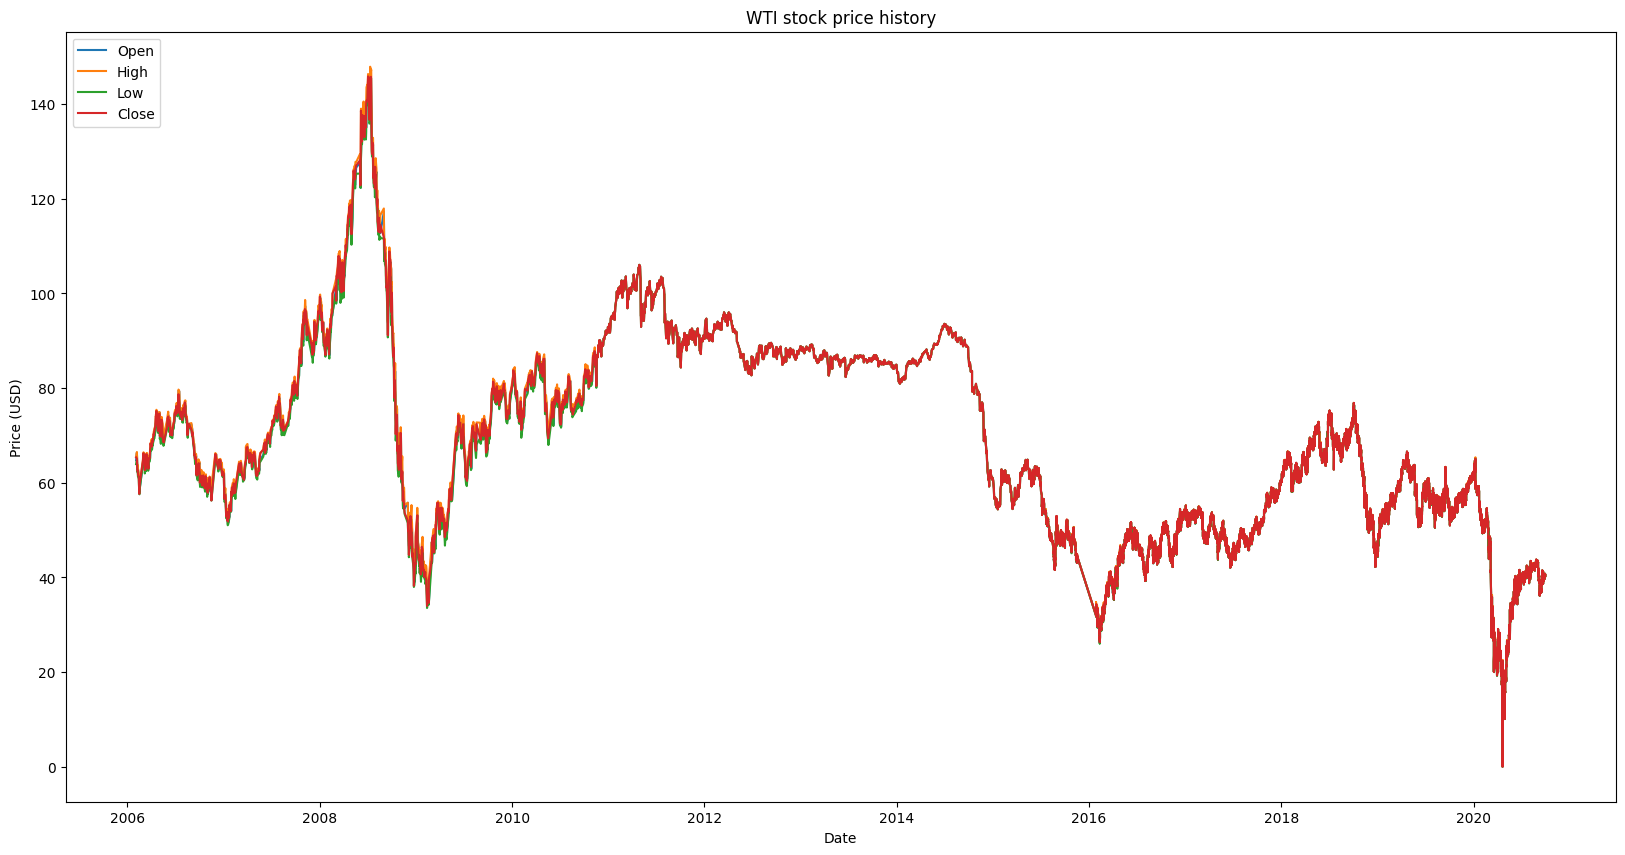

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Open"])
plt.plot(df["Date"], df["High"])
plt.plot(df["Date"], df["Low"])
plt.plot(df["Date"], df["Close"])
plt.title('WTI stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(["Open", "High", "Low", "Close"], loc='upper left')
plt.show()

### &#9899; Result:
So we see that columns of " open, high, low " and close prices don’t vary too much

##### **<span style="color: red; font-weight: bold;">* in the basis of this result, we consider two column of DATE and CLOSE as much important features which effect our algorithms.*</span>**

##

<div style="text-align: left;">
    <h1 style = "font-size:26px;font-weight: bold;">&star; Dropping features and continuing with only Date and Close columns:</h1>
</div>


In [9]:
# بر اساس كامنت بالا
# حذف ستونهاي اضافي 
df = df.drop(columns=["Time", "Open", "High", "Low", "Tickvol","Vol", "Spread"])
# df = df[["Date", "Close"]]  # روش دوم
df.head()

,Date,Close
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


#

<div style="text-align: left;">
    <h1 style = "font-size:26px;font-weight: bold;">&star; Considering working days from February 3, 2006, to September 29, 2020:</h1>
</div>


In [10]:
# first day and last day of the DATE column:
min_date = df['Date'].min()
max_date = df['Date'].max()
print(f"محدوده تاریخ: از ({min_date}) تا ({max_date})")

محدوده تاریخ: از (2006-02-03 00:00:00) تا (2020-09-29 00:00:00)


In [11]:
range_ = pd.date_range('2006-02-03', '2020-09-29', freq='B') # B: Business Days
range_

DatetimeIndex(['2006-02-03', '2006-02-06', '2006-02-07', '2006-02-08',
               '2006-02-09', '2006-02-10', '2006-02-13', '2006-02-14',
               '2006-02-15', '2006-02-16',
               ...
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-28', '2020-09-29'],
              dtype='datetime64[ns]', length=3823, freq='B')

##

<div style="text-align: left;">
    <h1 style = "font-size:26px;font-weight: bold;">&star; Calculating the average closing price for each working day and creating a new DataFrame:</h1>
</div>


In [12]:
# Checking if a specific date has multiple different values for CLOSE
duplicate_close_dates = df.groupby('Date')['Close'].nunique()

# Filtering dates that have more than one CLOSE value
multiple_close_dates = duplicate_close_dates[duplicate_close_dates > 1]

print(multiple_close_dates)


Date
2010-12-01      2
2011-01-05      2
2011-01-26      2
2011-02-17      2
2011-02-23      2
             ... 
2020-09-23    115
2020-09-24    104
2020-09-25     88
2020-09-28     98
2020-09-29     46
Name: Close, Length: 1448, dtype: int64


In [13]:
data = []
for day in range_:
  temp = []
  temp.append(day.date())
  temp.append(round(np.mean(np.array(df[df["Date"] == day]["Close"])),2))
  data.append(temp)
new_df = pd.DataFrame(data)
new_df.head()

,0,1
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


<div dir="ltr";style="text-align: LEFT;">
        <h1 style = "font-size:26px;font-weight: bold;">&star; Drop Null Values:</h1>
</div>

In [14]:
num_nans = new_df.isnull().sum(axis = 0)
new_df.dropna(inplace=True)
new_df.columns = ["Date", "Close"]
new_df.set_index("Date", inplace=True)
new_df.head()

,Close
Date,
2006-02-03,65.37
2006-02-06,65.11
2006-02-07,63.09
2006-02-08,62.55
2006-02-09,62.62


<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Storing dates separately for use in plotting charts (optional):</h1>
</div>

In [15]:
date_index = new_df.index.values
date_index

array([datetime.date(2006, 2, 3), datetime.date(2006, 2, 6),
       datetime.date(2006, 2, 7), ..., datetime.date(2020, 9, 25),
       datetime.date(2020, 9, 28), datetime.date(2020, 9, 29)],
      dtype=object)

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Converting the original data to a Numpy Array:</h1>
</div>


In [16]:
df_array = np.array(new_df)
shape_df = df_array.shape
shape_df

(3571, 1)

In [17]:
data = np.array(df_array).reshape(-1, 1)
print(data.shape)
data

(3571, 1)


array([[65.37],
       [65.11],
       [63.09],
       ...,
       [40.23],
       [40.21],
       [40.35]])

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star;  Scaling the data using Min-Max Scaler:</h1>
</div>


In [18]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
data = scaler.fit_transform(data)

In [20]:
# Pickle & Saving Scaler for future use:
with open('scaler_cnn.pkl', 'wb') as file:
    pickle.dump(scaler, file)

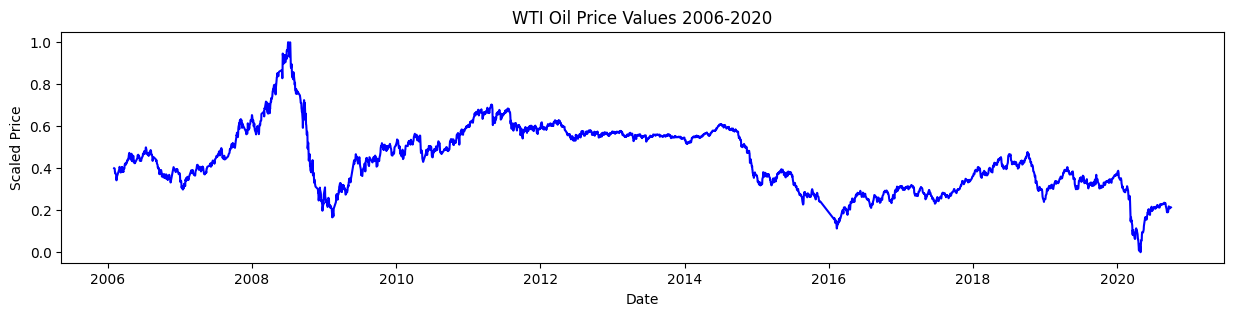

In [21]:
fig = plt.figure(figsize=(15,3))
plt.plot(date_index, data, color='blue')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.title('WTI Oil Price Values 2006-2020')
plt.show()

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Splitting data:</h1>
</div>

In [22]:
# Calculate the size of training and testing data
train_size = int(len(data) * 0.8)

# Split data into training and testing sets
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]   

# Split dates into training and testing sets for use in future plots
train_dates, test_dates = date_index[0:train_size], date_index[train_size:len(data)]


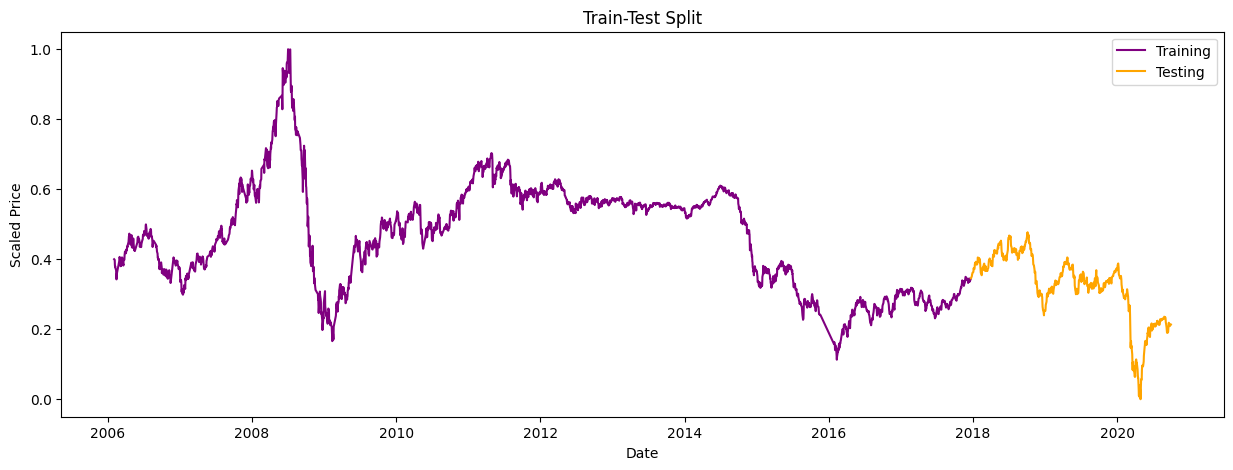

In [23]:
#displays a plot of the train/test split
plt.figure(figsize=(15,5))
plt.plot(train_dates, train_data, color='purple', label='Training')
plt.plot(test_dates, test_data, color='orange', label='Testing')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.title('Train-Test Split')
plt.legend()
plt.show()

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; create_dataset function:</h1>
    <p style="font-size: 20px; text-align: justify;">
        The create_dataset function transforms time series data into sequences suitable for training sequence-based models. 
        This function prepares the time series data for use in deep learning models, particularly CNN neural networks.
    </p>
    <p style="font-size: 20px; text-align: justify;">
        This process involves converting the data into sequences of values where each sequence serves as input for the model, 
        and the next value in the sequence is considered as the output.
    </p>
    <h1 style="font-size:26px;font-weight: bold;"> timestep (optional): </h1>
    <p style="font-size: 20px; text-align: justify;">
        An integer that specifies the number of past time steps in each sequence. The default is 1.
    </p>
</div>


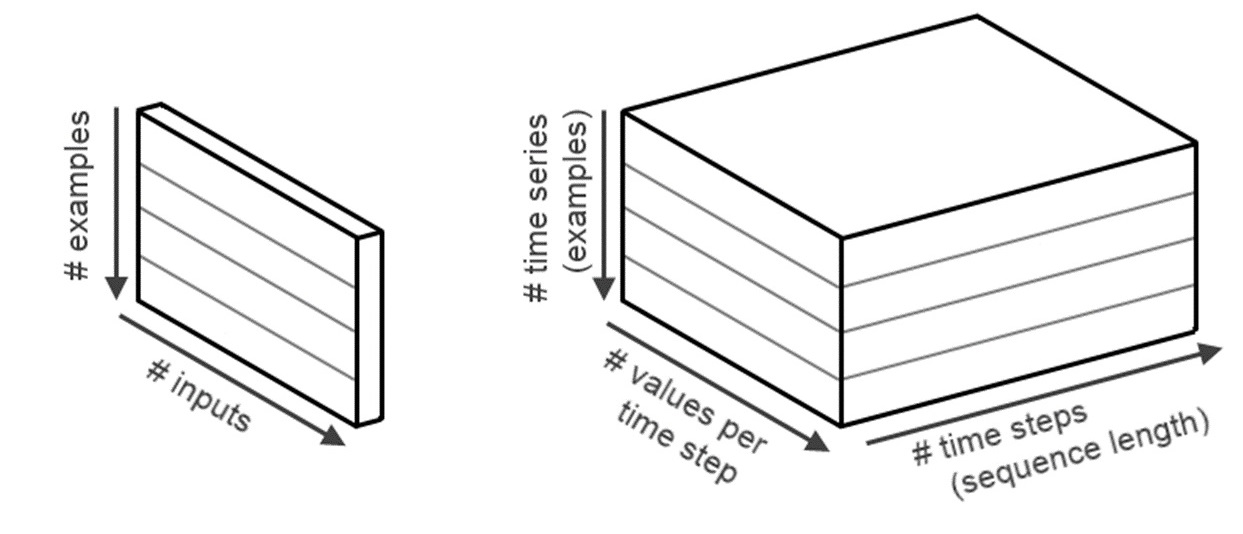

In [24]:
def create_dataset(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - timestep - 1):
        dataX.append(dataset[i:i+timestep]) #First data from array
        dataY.append(dataset[i+timestep])   #second data from array
    return np.array(dataX).astype('float32'), np.array(dataY).astype('float32')

In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(2755, 100, 1)
(614, 100, 1)


In [ ]:
# #Second Approach:
# def create_dataset(dataset, window_size = 1):
#     data_X, data_Y = [], []
#     for i in range(len(dataset) - window_size - 1):
#         a = dataset[i:(i + window_size), 0]
#         data_X.append(a)
#         data_Y.append(dataset[i + window_size, 0])
#     return(np.array(data# #Second Approach:
# def create_dataset2(dataset, window_size = 1):
#     dataX, dataY = [], []
#     for i in range(len(dataset) - window_size - 1):
#         a = dataset[i:(i + window_size), 0]
#         data_X.append(a)
#         data_Y.append(dataset[i + window_size, 0])
#     return np.array(dataX).astype('float32'), np.array(dataY).astype('float32')

# # Create test and training sets for one-step-ahead regression.
# window_size = 100
# X_train, y_train = create_dataset(train_data, window_size)
# X_test, y_test = create_dataset(test_data, window_size)
# print("Original training data shape:")
# print(X_train.shape)

# # Reshape the input data into appropriate form for Keras.
# train_X = np.reshape(X_train, (X_train.shape[0], window_size, X_train.shape[1]))
# test_X = np.reshape(X_test, (test_X.shape[0], window_size, X_test.shape[1]))
# print("New training data shape:")
# print(X_train.shape)
# print(X_test.shape)_X), np.array(data_Y))

# # Create test and training sets for one-step-ahead regression.
# window_size = 100
# train_X, train_Y = create_dataset(train, window_size)
# test_X, test_Y = create_dataset(test, window_size)
# print("Original training data shape:")
# print(train_X.shape)

# # Reshape the input data into appropriate form for Keras.
# train_X = np.reshape(train_X, (train_X.shape[0], window_size, train_X.shape[1]))
# test_X = np.reshape(test_X, (test_X.shape[0], window_size, test_X.shape[1]))
# print("New training data shape:")
# print(train_X.shape)

##

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Building First CNN Model:</h1>
</div>


In [27]:
# Early Stopping Callback:
# patience: Specifies the number of epochs that the model is allowed to continue training 
# without improvement in the monitored value (or validation loss).
# If no improvement is observed after this number of epochs, training will stop.
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=7, 
                               restore_best_weights=True)

In [28]:
# Sequential model initializes a linear stack of layers
model = tf.keras.models.Sequential()

# First Conv1D layer with 32 filters, kernel size of 8, and ReLU activation
# input_shape specifies the input data shape: (time_step, 1)
model.add(tf.keras.layers.Conv1D(32, 8, input_shape=(time_step, 1), activation='relu'))

# Second Conv1D layer with 64 filters and kernel size of 8, ReLU activation
model.add(tf.keras.layers.Conv1D(64, 8, activation='relu'))

# Dropout layer to prevent overfitting by randomly setting 50% of the inputs to zero
model.add(tf.keras.layers.Dropout(0.5))

# Third Conv1D layer with 128 filters and kernel size of 8, ReLU activation
model.add(tf.keras.layers.Conv1D(128, 8, activation='relu'))

# Flatten layer converts the 3D output from Conv1D layers into a 1D vector
# This is necessary to pass the data into fully connected (Dense) layers
model.add(tf.keras.layers.Flatten())

# Dense layer with 100 neurons and ReLU activation function
# It is a fully connected layer for further processing of the data
model.add(tf.keras.layers.Dense(100, activation='relu'))

# Dropout layer with a dropout rate of 25% to reduce overfitting
model.add(tf.keras.layers.Dropout(0.25))

# Final Dense layer with 1 neuron and a linear activation function
# This is the output layer, suitable for regression tasks (e.g., predicting a continuous value)
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Compiling the model:
# loss='mean_squared_error' specifies the loss function, which is MSE (Mean Squared Error).
# This is commonly used for regression tasks to minimize the squared difference between predicted and actual values.
# optimizer='adam' specifies the optimizer, in this case, Adam (Adaptive Moment Estimation).
# Adam is a popular optimizer that adjusts learning rates dynamically and works well with most deep learning models.
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 93, 32)            288       
                                                                 
 conv1d_1 (Conv1D)           (None, 86, 64)            16448     
                                                                 
 dropout (Dropout)           (None, 86, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 79, 128)           65664     
                                                                 
 flatten (Flatten)           (None, 10112)             0         
                                                                 
 dense (Dense)               (None, 100)               1011300   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [ ]:
# (n-f/s)+1 = (93-8/1)+1 = 86
# conv1d (Conv1D) params ---> 32filter*8 kernel =256+8bias=288
# conv1d_1 (Conv1D) params ---> 32 previous *64 kernel *8 filter + 64 bias = 16448
# conv1d_2 (Conv1D) params ---> 64 previous *128 kernel *8 filter + 128 bias = 65664

In [29]:
# Train the model with both callbacks
hist_cnn = model.fit(X_train, y_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_test, y_test), 
                      callbacks=[early_stopping],
                      verbose=1)

Epoch 1/100
87/87 [==============================] - 3s 22ms/step - loss: 0.0460 - val_loss: 0.0061
Epoch 2/100
87/87 [==============================] - 2s 20ms/step - loss: 0.0088 - val_loss: 0.0037
Epoch 3/100
87/87 [==============================] - 2s 22ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 4/100
87/87 [==============================] - 2s 21ms/step - loss: 0.0071 - val_loss: 0.0024
Epoch 5/100
87/87 [==============================] - 2s 20ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 6/100
87/87 [==============================] - 2s 21ms/step - loss: 0.0064 - val_loss: 0.0029
Epoch 7/100
87/87 [==============================] - 2s 21ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 8/100
87/87 [==============================] - 2s 22ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 9/100
87/87 [==============================] - 2s 21ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 10/100
87/87 [==============================] - 2s 21ms/step - loss: 0.0049 - val_loss: 0.0032

In [30]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

20/20 [==============================] - 0s 5ms/step


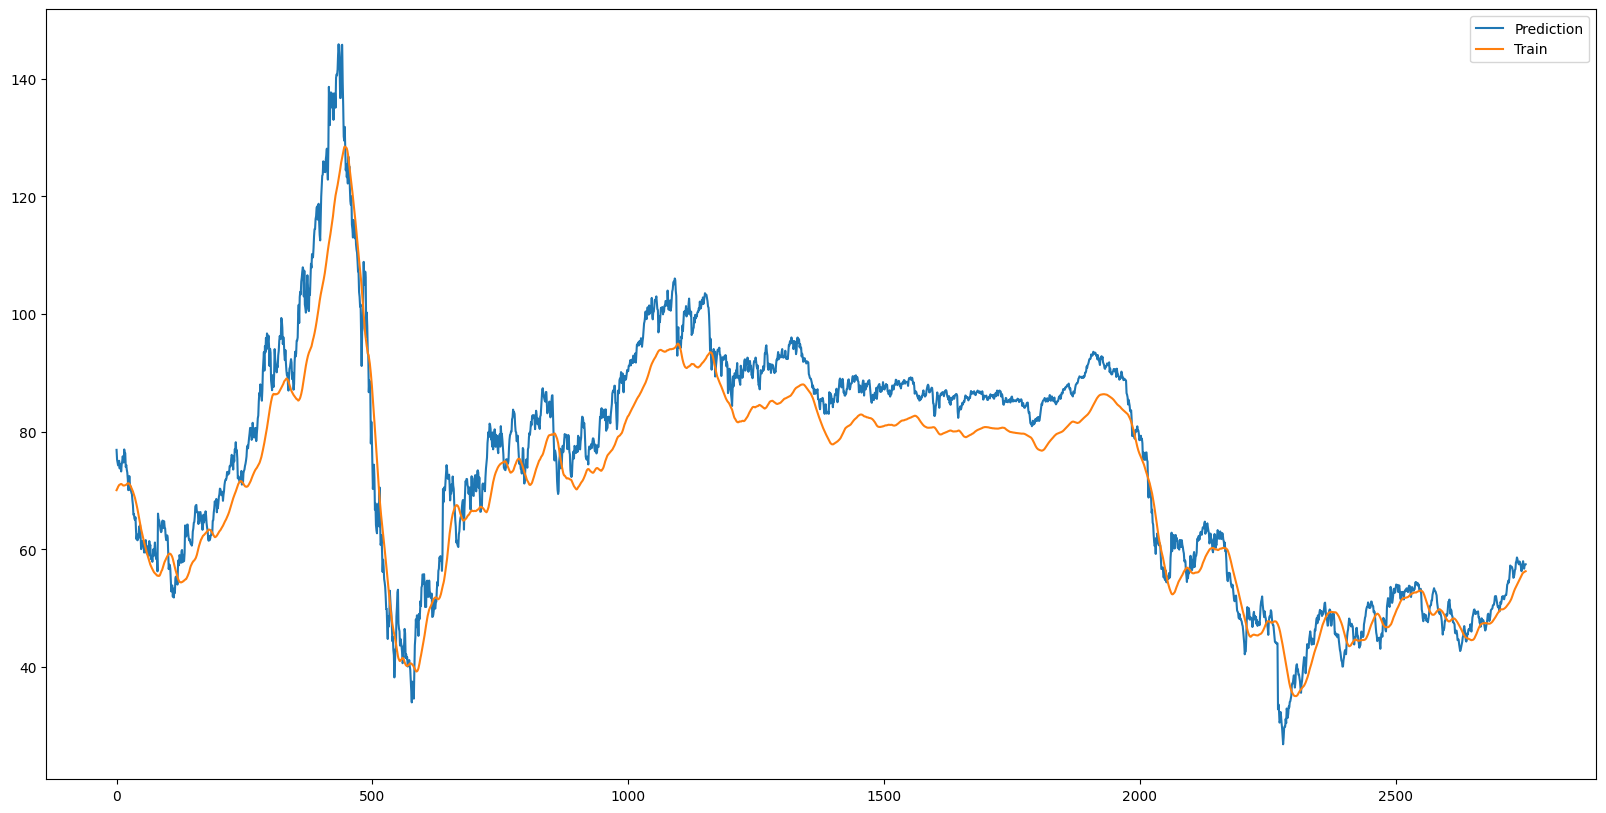

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(y_train)
plt.plot(train_pred)
plt.legend({"Train", "Prediction"})
plt.show()

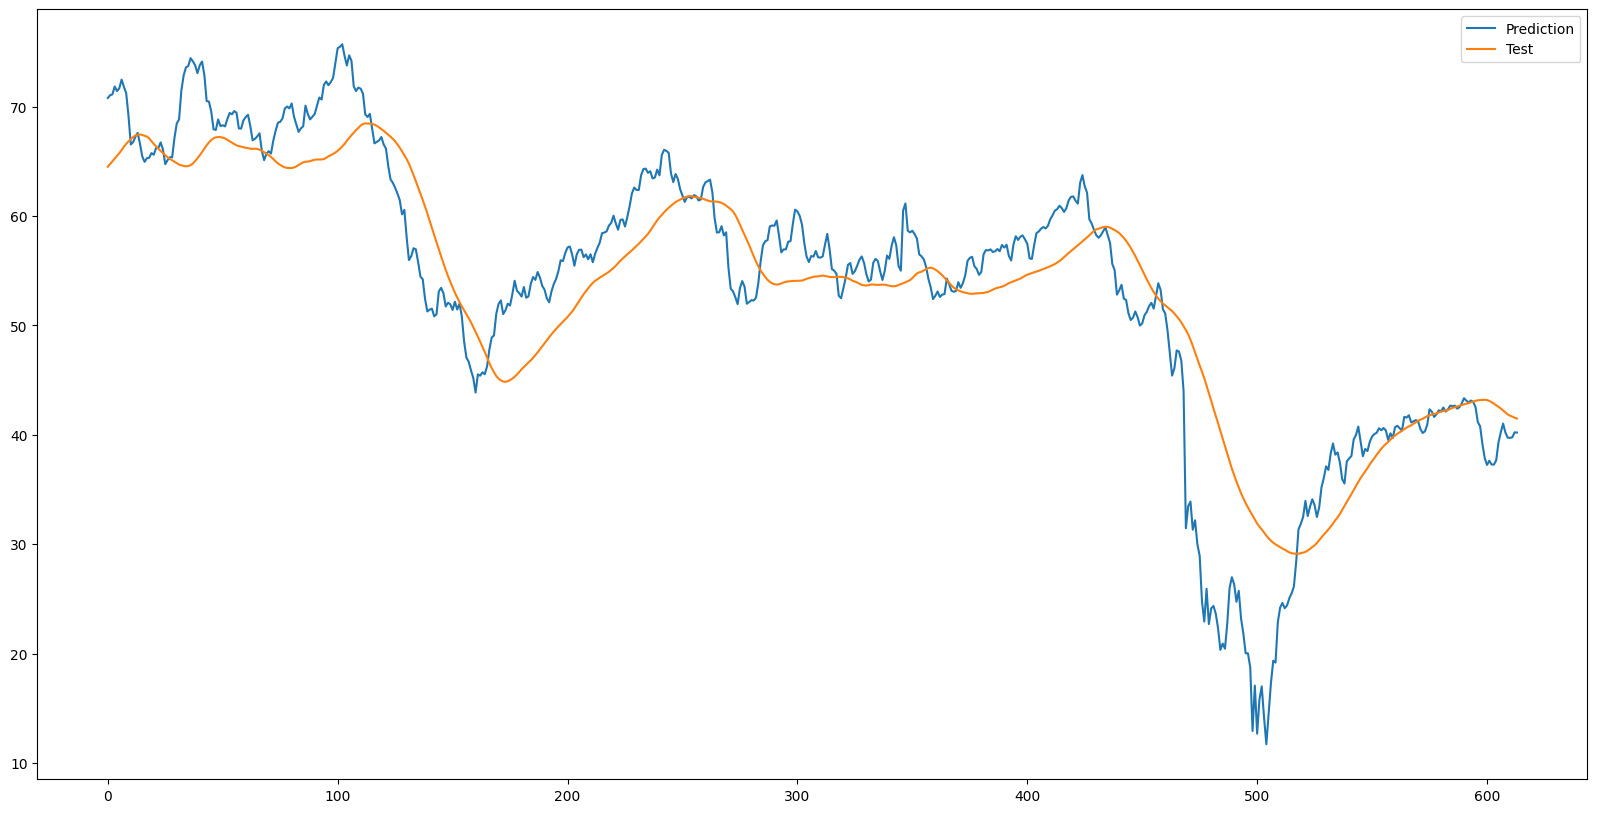

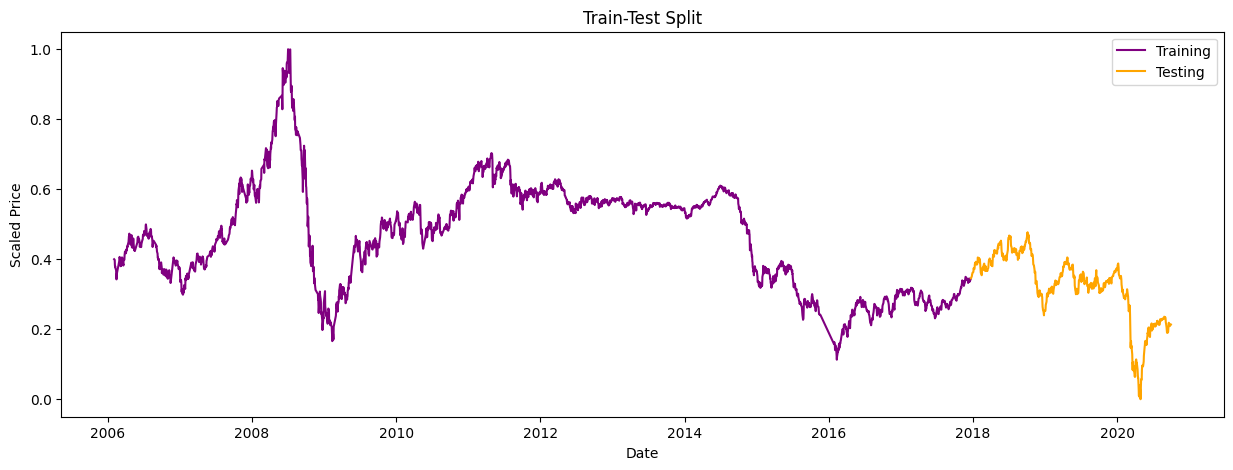

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(y_test)
plt.plot(test_pred)
plt.legend({"Test", "Prediction"})
plt.show()

plt.figure(figsize=(15,5))
plt.plot(train_dates, train_data, color='purple', label='Training')
plt.plot(test_dates, test_data, color='orange', label='Testing')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.title('Train-Test Split')
plt.legend()
plt.show()

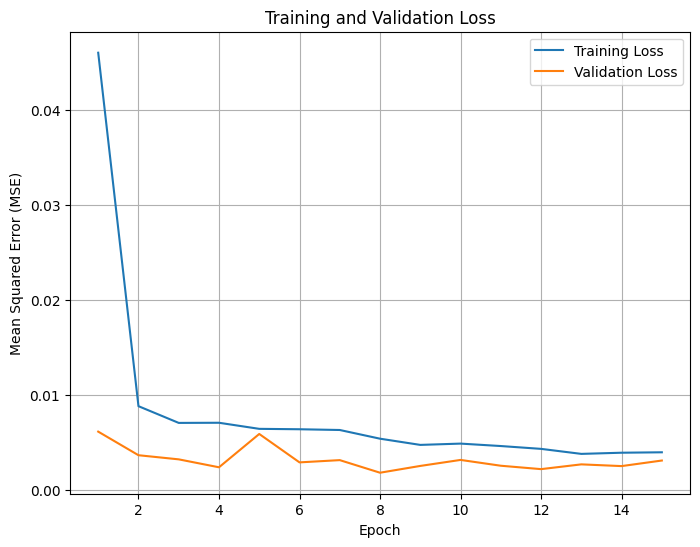

In [33]:
train_loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(np.arange(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
mae, mse = mean_absolute_error(y_test, test_pred), mean_squared_error(y_test,test_pred)

In [35]:
mae, mse

(4.1919556, 32.70572)

##

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Building Second CNN Model:</h1>
</div>


In [58]:
# Define hyperparameters (adjust these values)
time_step = 100
learning_rate = 0.001  # Experiment with different learning rates using GridSearchCV
epochs = 100
batch_size = 128

# Create training and testing datasets
X_train2, y_train2 = create_dataset(train_data, time_step)
X_test2, y_test2 = create_dataset(test_data, time_step)

# Reshape input data for CNN
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

# Define the CNN model
model2 = Sequential()
model2.add(Conv1D(32, 8, input_shape=(time_step, 1), activation='relu'))
model2.add(Conv1D(64, 8, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Conv1D(128, 8, activation='relu'))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer and Early Stopping
model2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
hist2 = model2.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), epochs=epochs,
                 batch_size=batch_size, verbose=1, callbacks=[early_stopping])


Epoch 1/100
22/22 [==============================] - 2s 56ms/step - loss: 0.3183 - val_loss: 0.0709
Epoch 2/100
22/22 [==============================] - 1s 50ms/step - loss: 0.0853 - val_loss: 0.0146
Epoch 3/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0623 - val_loss: 0.0081
Epoch 4/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0576 - val_loss: 0.0070
Epoch 5/100
22/22 [==============================] - 1s 55ms/step - loss: 0.0608 - val_loss: 0.0064
Epoch 6/100
22/22 [==============================] - 1s 50ms/step - loss: 0.0556 - val_loss: 0.0064
Epoch 7/100
22/22 [==============================] - 1s 53ms/step - loss: 0.0528 - val_loss: 0.0056
Epoch 8/100
22/22 [==============================] - 1s 53ms/step - loss: 0.0524 - val_loss: 0.0053
Epoch 9/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0479 - val_loss: 0.0039
Epoch 10/100
22/22 [==============================] - 1s 56ms/step - loss: 0.0448 - val_loss: 0.0041

In [59]:
train_pred2 = model2.predict(X_train2)
test_pred2 = model2.predict(X_test2)
train_pred2 = scaler.inverse_transform(train_pred2)
test_pred2 = scaler.inverse_transform(test_pred2)
y_train2 = scaler.inverse_transform(y_train2)
y_test2 = scaler.inverse_transform(y_test2)

20/20 [==============================] - 0s 4ms/step


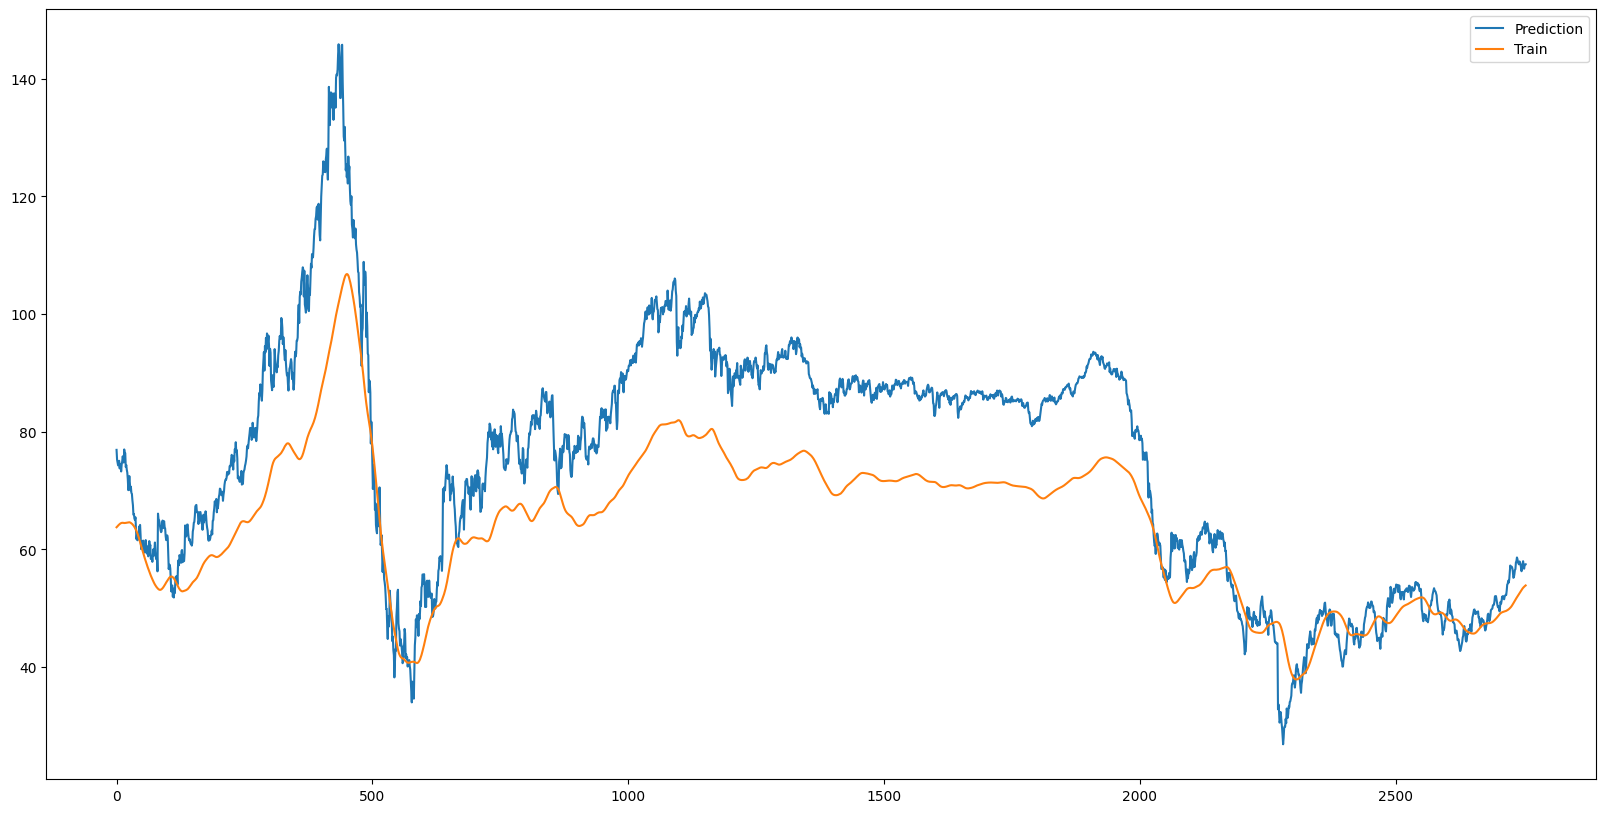

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(y_train2)
plt.plot(train_pred2)
plt.legend({"Train", "Prediction"})
plt.show()

In [61]:
mae, mse = mean_absolute_error(y_test2, test_pred2), mean_squared_error(y_test2,test_pred2)

In [62]:
mae, mse

(6.014621, 55.792408)

<div style="text-align: left;"> <h1 style="font-size:26px;font-weight: bold;">&star; End of Step Five: Implementation of the CNN Algorithm</h1> </div>